In [1]:
### 30개의 프레임으로 이루어진 tif 파일을 1개의 프레임으로 나누어 따로따로 저장할 수 있게끔 코드 작성

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms, datasets

In [3]:
# 데이터 불러오기
dir_data = './datasets'

name_label = 'train-labels.tif'
name_input = 'train-volume.tif'

img_label = Image.open(os.path.join(dir_data, name_label))
img_input = Image.open(os.path.join(dir_data, name_input))

ny, nx = img_label.size                  # 512 * 512
nframe = img_label.n_frames              # 30 frame

In [4]:
# dataset을 Train과 Test로 나누기
nframe_train = 24
nframe_val = 3
nframe_test = 3

# data가 저장될 Directory 설정하기
dir_save_train = os.path.join(dir_data, 'train')
dir_save_val = os.path.join(dir_data, 'val')
dir_save_test = os.path.join(dir_data, 'test')

# Dir 생성
if not os.path.exists(dir_save_train) :
    os.makedirs(dir_save_train)
if not os.path.exists(dir_save_val) :
    os.makedirs(dir_save_val)
if not os.path.exists(dir_save_test) :
    os.makedirs(dir_save_test)

In [5]:
# data dir에 dataset을 Random 하게 저장하기
id_frame = np.arange(nframe)
np.random.shuffle(id_frame)

#train set 저장하기
offset_nframe = 0

for i in range(nframe_train) :
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])
    
    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)
    
    np.save(os.path.join(dir_save_train, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_train, 'label_%03d.npy' % i), input_)
    
# val set 저장하기
offset_nframe += nframe_train

for i in range(nframe_val) :
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])
    
    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)
    
    np.save(os.path.join(dir_save_val, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_val, 'label_%03d.npy' % i), input_)
    
# test set 저장하기
offset_nframe += nframe_val

for i in range(nframe_test) :
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])
    
    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)
    
    np.save(os.path.join(dir_save_test, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_test, 'label_%03d.npy' % i), input_)

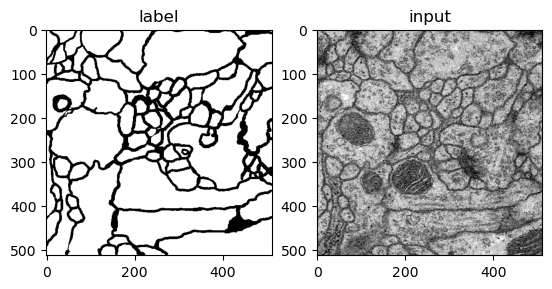

In [6]:
# 생성된 데이터를 matplotib 로 확인하기

plt.subplot(121)
plt.imshow(label_, cmap='gray')
plt.title('label')

plt.subplot(122)
plt.imshow(input_, cmap='gray')
plt.title('input')

plt.show()